In [1]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
OUT_DIR = "S01"
os.makedirs(OUT_DIR, exist_ok=True)

In [3]:
BASE_DIR = Path.cwd()  # Current directory of the running file
DATA_DIR = BASE_DIR.parent / "T03_af"
CURRENT_DIR = BASE_DIR

In [4]:
with open(DATA_DIR / "S10_af_time_series.pkl", "rb") as f:
    data = pickle.load(f)

afs = data["data"]
fz_info = pd.read_excel(DATA_DIR / "S16_af_info.xlsx")

In [5]:
fz_info

,sample_no,DynoWare,Path,Filename,Config ID,Setup ID,Manipulated,Filename 1,Filename 2,Date,...,LOC4_idx,LOC5_time,LOC5_Fz,LOC5_idx,LOC6_time,LOC6_Fz,LOC6_idx,LOC7_time,LOC7_Fz,LOC7_idx
0,1,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 1.dwd,Sample 1.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,10356,118.560000,1.955412,11856,133.560000,1.987789,13356,148.560000,2.062822,14856
1,2,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 2.dwd,Sample 2.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,10762,122.620000,1.798143,12262,137.620000,1.866014,13762,152.620000,1.937174,15262
2,3,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 3.dwd,Sample 3.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,11324,128.240000,1.864614,12824,143.240000,1.914791,14324,158.240000,1.938849,15824
3,4,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 4.dwd,Sample 4.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9235,105.211429,1.884570,10521,118.068571,1.940492,11807,130.925714,2.004096,13093
4,5,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 5.dwd,Sample 5.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9816,111.021429,1.482512,11102,123.878571,1.501797,12388,136.735714,1.523190,13674
5,6,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 6.dwd,Sample 6.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9937,112.231429,1.391324,11223,125.088571,1.414208,12509,137.945714,1.392280,13795
6,7,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 7.dwd,Sample 7.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,8324,94.490000,1.727454,9449,105.740000,1.824198,10574,116.990000,1.864062,11699
7,8,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 8.dwd,Sample 8.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,8965,100.900000,1.458888,10090,112.150000,1.585516,11215,123.400000,1.611573,12340
8,9,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 9.dwd,Sample 9.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,9662,107.870000,1.663417,10787,119.120000,1.745621,11912,130.370000,1.794847,13037
9,10,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 10.dwd,Sample 10.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,10032,115.320000,1.520111,11532,130.320000,1.587619,13032,145.320000,1.711081,14532


In [20]:
# Calculate value of location
# sample_no = 54

df_arr = []
for sample_no in fz_info["sample_no"].values:

    # Extract relevant data
    af = afs.loc[afs["sample_no"] == sample_no].reset_index(drop=True)
    af.set_index("Time", inplace=True)
    info = fz_info[fz_info["sample_no"] == sample_no].iloc[0]
    cols_loc_idx = [f"LOC{i}_idx" for i in range(1, 8)]
    loc_time_idxs = info[cols_loc_idx].values
    af_mean = af.rolling(window=30).mean()
    loc_fx = af_mean["Fx"].iloc[loc_time_idxs].values
    loc_fz = af_mean["Fz"].iloc[loc_time_idxs].values
    loc_mz = af_mean["Mz"].iloc[loc_time_idxs].values

    _df = pd.DataFrame({
        "sample_no": sample_no,
        "Location": [f"LOC{i}" for i in range(1, 8)],
        "Fx": loc_fx,
        "Fz": loc_fz,
        "Mz": loc_mz    
    })
    df_arr.append(_df)
df_locs = pd.concat(df_arr).reset_index(drop=True)
df_locs

,sample_no,Location,Fx,Fz,Mz
0,1,LOC1,-0.077671,1.244326,1.873865
1,1,LOC2,-0.027450,1.625039,4.615337
2,1,LOC3,-0.038704,1.799653,5.209334
3,1,LOC4,-0.023484,1.882699,5.764727
4,1,LOC5,-0.038251,1.955412,6.097497
...,...,...,...,...,...
373,54,LOC3,-0.079764,1.352393,5.512565
374,54,LOC4,-0.091477,1.529089,6.898179
375,54,LOC5,-0.068128,1.657737,7.940597
376,54,LOC6,-0.066880,1.712860,8.849661


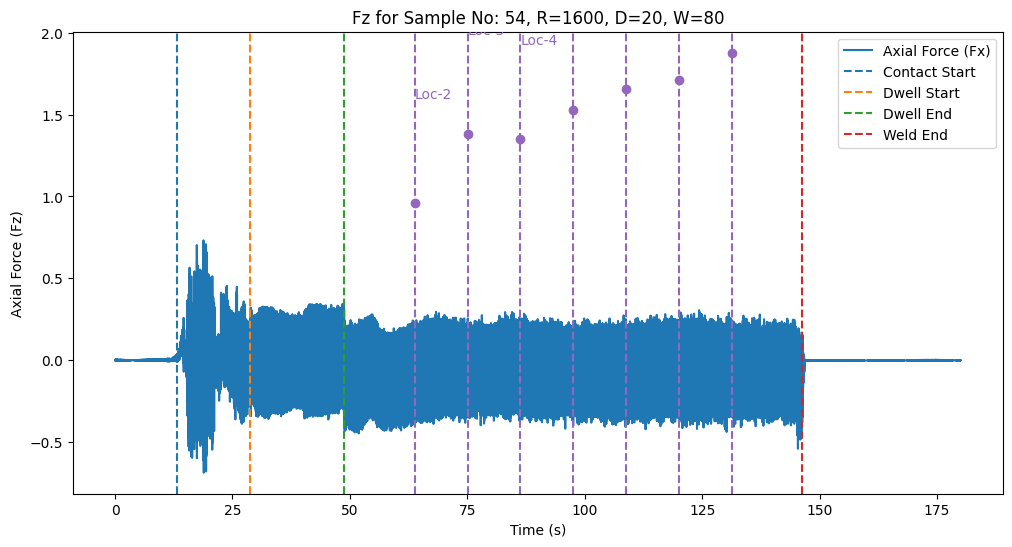

In [ ]:
sample_no = 54

cp = sns.color_palette(n_colors=5)

# Extract relevant data
af = afs.loc[afs["sample_no"] == sample_no].reset_index(drop=True)
af.set_index("Time", inplace=True)
info = fz_info[fz_info["sample_no"] == sample_no].iloc[0]
R = fz_info[fz_info["sample_no"] == sample_no]["R"].values[0]
D = fz_info[fz_info["sample_no"] == sample_no]["D"].values[0]
W = fz_info[fz_info["sample_no"] == sample_no]["W"].values[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(af.index, af["Fx"], label="Axial Force (Fx)")
ax.axvline(
    info["contact_time_start"], color=cp[0], linestyle="--", label="Contact Start"
)
ax.axvline(info["dwell_time_start"], color=cp[1], linestyle="--", label="Dwell Start")
ax.axvline(info["dwell_time_end"], color=cp[2], linestyle="--", label="Dwell End")
ax.axvline(info["weld_time_end"], color=cp[3], linestyle="--", label="Weld End")

for i in range(1, 8):
    col_name_time = f"LOC{i}_time"
    col_name_idx = f"LOC{i}_idx"
    col_name_value = f"LOC{i}_Fz"
    loc_idx = info[col_name_idx]
    loc_value = info[col_name_value]
    ax.axvline(info[col_name_time], color=cp[4], linestyle="--")
    ax.text(
        info[col_name_time],
        af["Fz"].iloc[loc_idx] + af["Fz"].max() * 0.2,
        f"Loc-{i + 1}",
        verticalalignment="center",
        color=cp[4],
        clip_on=True,
    )
    ax.plot(
        af.index[loc_idx],
        loc_value,
        marker="o",
        color=cp[4],
    )

ax.set_title(f"Fz for Sample No: {sample_no}, R={R}, D={D}, W={W}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Axial Force (Fz)")
ax.legend()
plt.show()
